In [72]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import classification_report
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import tqdm as tqdm

In [73]:
class_names=['balcony','corridor','lobby','room','terrace']
class_names_labels={class_name:i for i, class_name in enumerate(class_names)}
nb_classes=len(class_names)
print(class_names_labels)
IMAGE_SIZE=(225,225)

{'balcony': 0, 'corridor': 1, 'lobby': 2, 'room': 3, 'terrace': 4}


In [74]:
# loading data
def load_data():
    DIRECTORY=r"C:\Users\kumar\OneDrive\Desktop\ml\image_classifier\hotel"
    CATEGORY=["train","test"]

    output=[]

    for category in CATEGORY:
        path=os.path.join(DIRECTORY,category);
        print(path)
        images=[]
        labels=[]

        print("Loading {}".format(category))

        for folder in os.listdir(path):
            label=class_names_labels[folder]

            # iterate over each image in the folder
            for file in os.listdir(os.path.join(path,folder)):
                
                # get the path name of the image
                img_path=os.path.join(os.path.join(path,folder),file)

                # open and resize the image
                image=cv2.imread(img_path)
                image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                image=cv2.resize(image,IMAGE_SIZE)

                #append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
        
        images=np.array(images,dtype='float32')
        labels=np.array(labels,dtype='int32')

        output.append((images,labels))
    
    return output

In [75]:
(train_images,train_labels),(test_images,test_labels)=load_data()

C:\Users\kumar\OneDrive\Desktop\ml\image_classifier\hotel\train
Loading train
C:\Users\kumar\OneDrive\Desktop\ml\image_classifier\hotel\test
Loading test


In [76]:
def display_examples(class_names,images,labels):
    
    #displaying 5 images from images with is labels

    figsize=(50,50)
    fig=plt.figure(figsize=figsize)
    fig.suptitle("Some examples of images of the dataset",fontsize=16)
    
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        image=cv2.resize(images[i],figsize)
        plt.imshow(image.astype(np.uint8))
        plt.xlabel(class_names[labels[i]])
    plt.show()

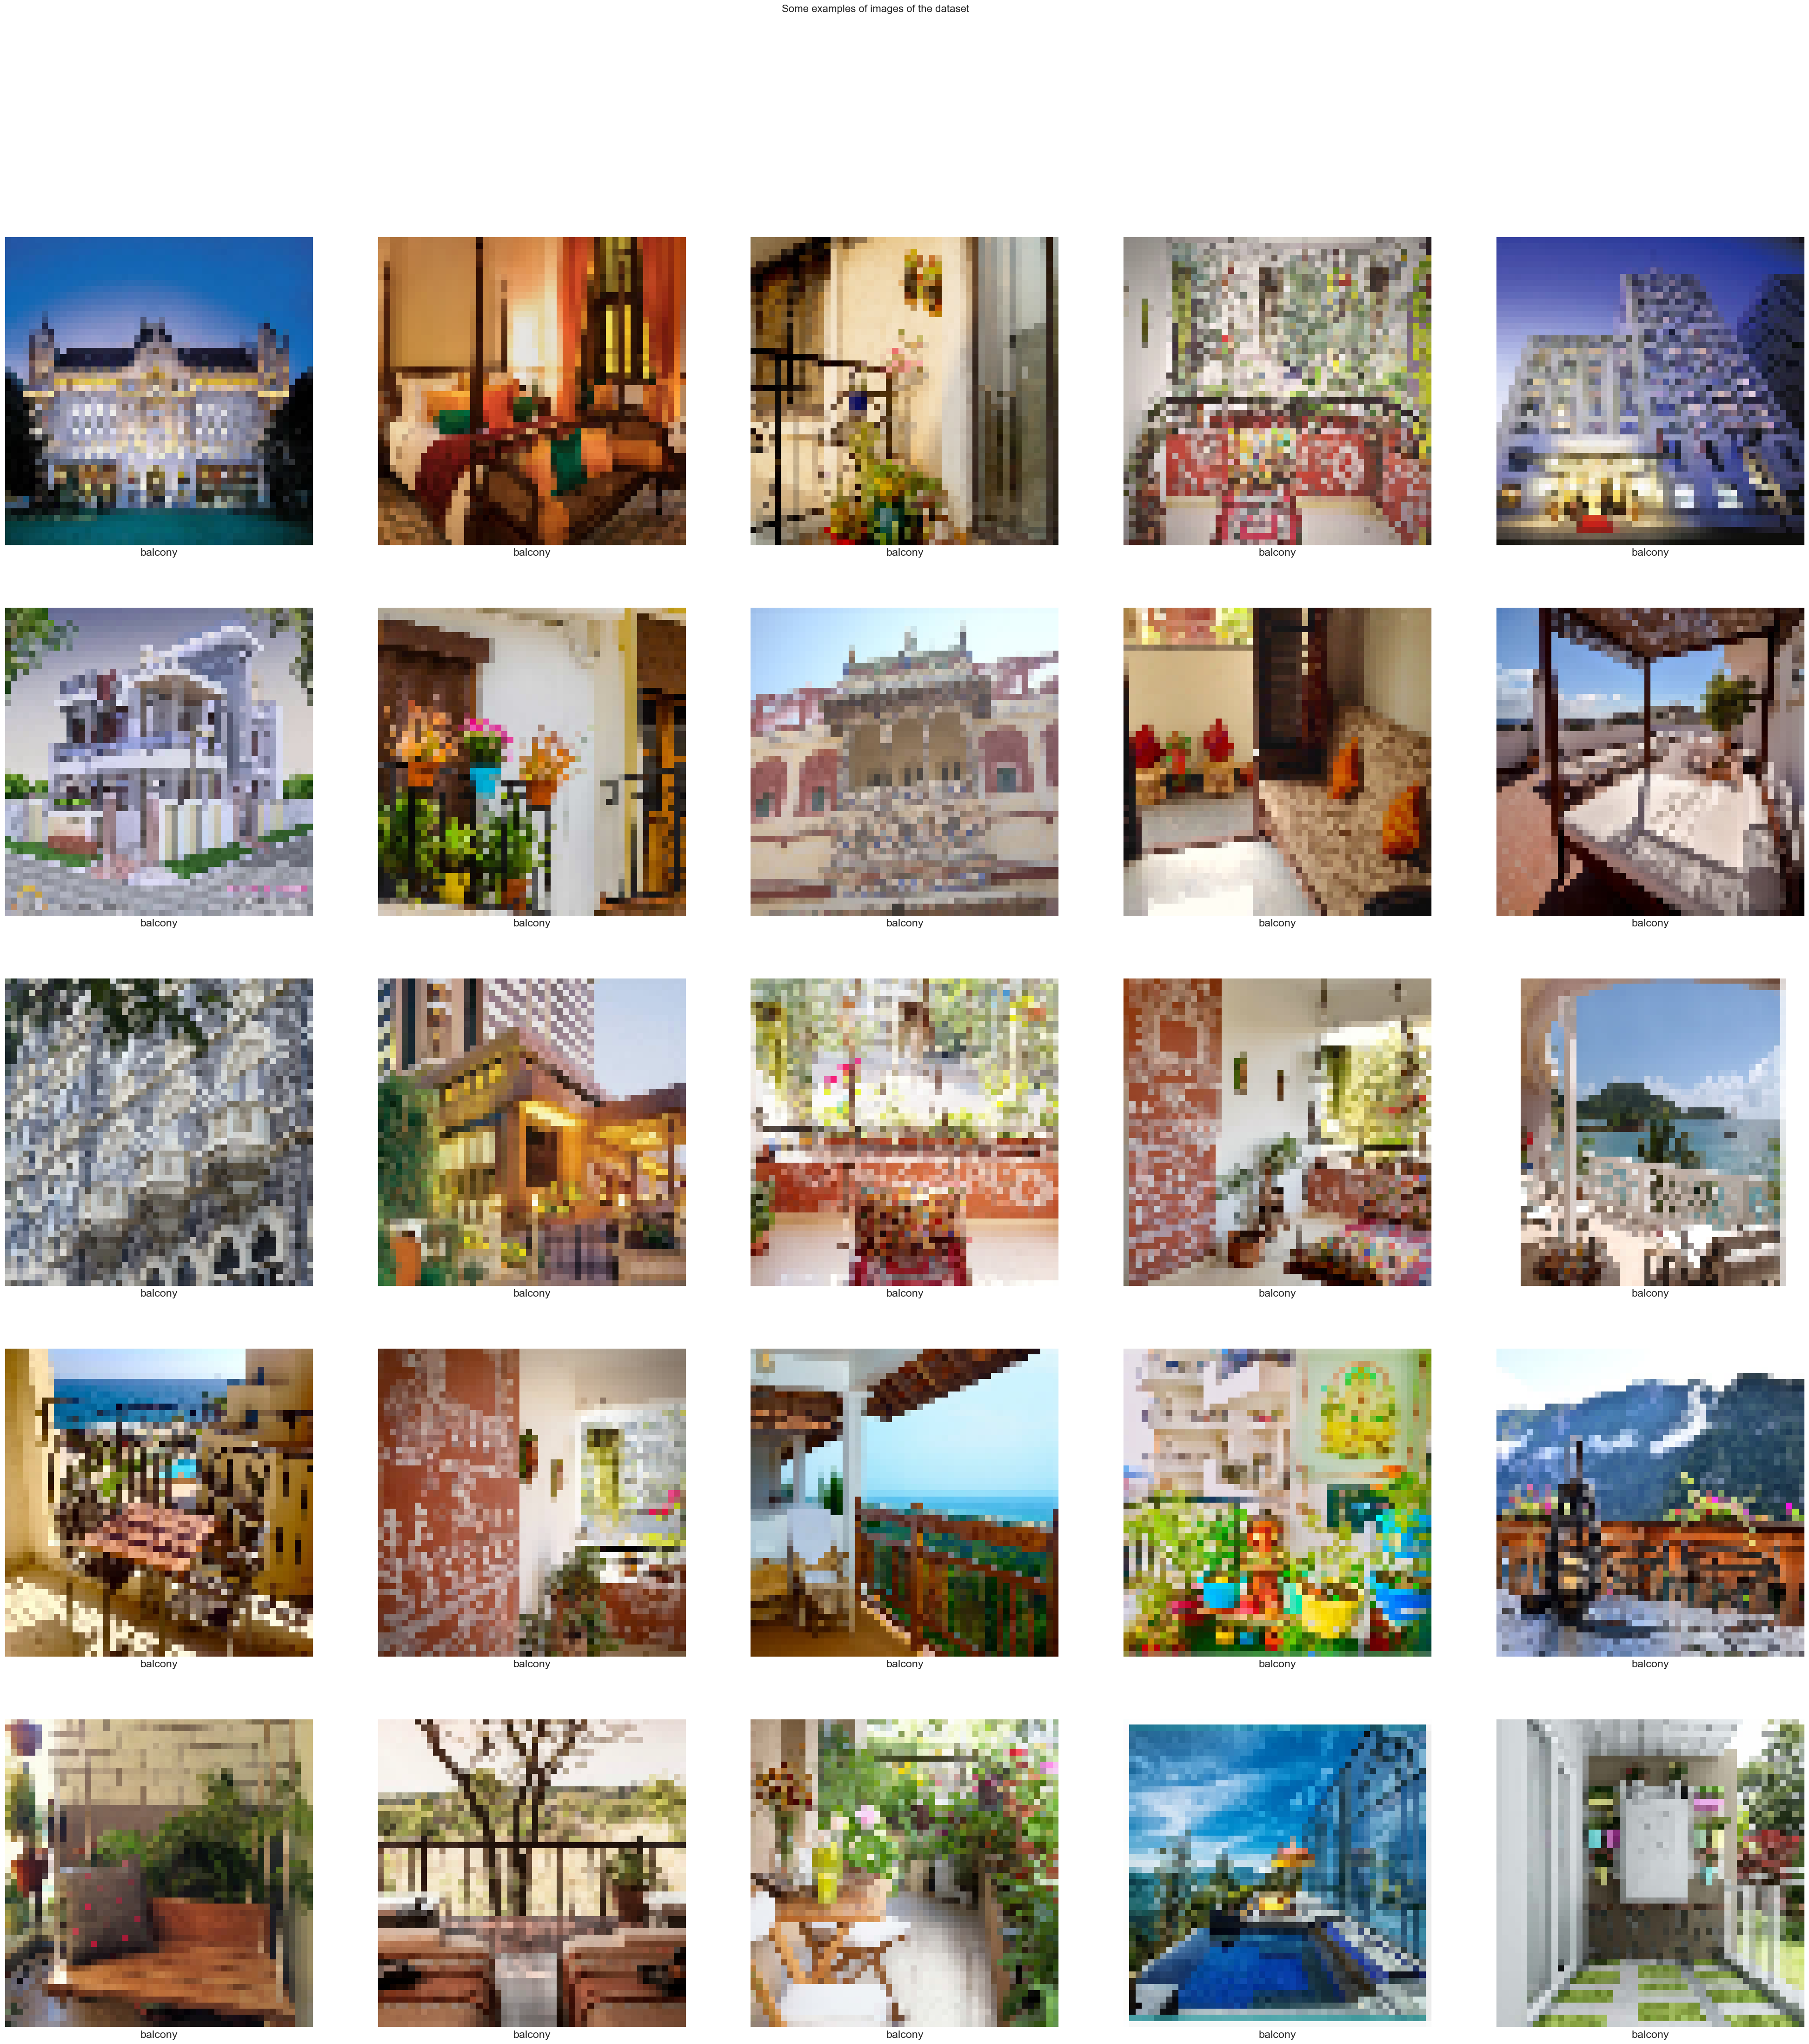

In [77]:
display_examples(class_names,train_images,train_labels)

In [78]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(225,225,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(5,activation=tf.nn.softmax)
])

In [79]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [80]:
history=model.fit(train_images,train_labels,batch_size=64,epochs=5,validation_split=0.2)

Epoch 1/5
4/4 [==============================] - 8s 2s/step - loss: 329.6559 - accuracy: 0.1950 - val_loss: 5330.0029 - val_accuracy: 0.0000e+00
Epoch 2/5
4/4 [==============================] - 6s 1s/step - loss: 822.9853 - accuracy: 0.2550 - val_loss: 1761.3966 - val_accuracy: 0.0000e+00
Epoch 3/5
4/4 [==============================] - 6s 1s/step - loss: 136.0151 - accuracy: 0.4050 - val_loss: 538.5473 - val_accuracy: 0.0000e+00
Epoch 4/5
4/4 [==============================] - 6s 1s/step - loss: 24.3905 - accuracy: 0.4650 - val_loss: 224.4455 - val_accuracy: 0.0000e+00
Epoch 5/5
4/4 [==============================] - 5s 1s/step - loss: 2.5297 - accuracy: 0.7300 - val_loss: 166.0908 - val_accuracy: 0.0000e+00


In [81]:
test_loss=model.evaluate(test_images,test_labels)

4/4 [==============================] - 1s 127ms/step - loss: 31.8622 - accuracy: 0.2800


In [82]:
predictions=model.predict(test_images)
pred_labels=np.argmax(predictions,axis=1)
print(classification_report(test_labels,pred_labels))

4/4 [==============================] - 1s 151ms/step
              precision    recall  f1-score   support

           0       0.24      0.70      0.35        20
           1       0.50      0.10      0.17        20
           2       0.28      0.35      0.31        20
           3       0.42      0.25      0.31        20
           4       0.00      0.00      0.00        20

    accuracy                           0.28       100
   macro avg       0.29      0.28      0.23       100
weighted avg       0.29      0.28      0.23       100



c:\Users\kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [83]:
def plot_accuracy_loss(history):
    fig=plt.figure(figsize=(10,5))

    #plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--',label="acc")
    plt.plot(history.history['val_accuracy'],'ro--',label="val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    #plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--',label="loss")
    plt.plot(history.history['val_loss'],'ro--',label="val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")
    plt.legend()

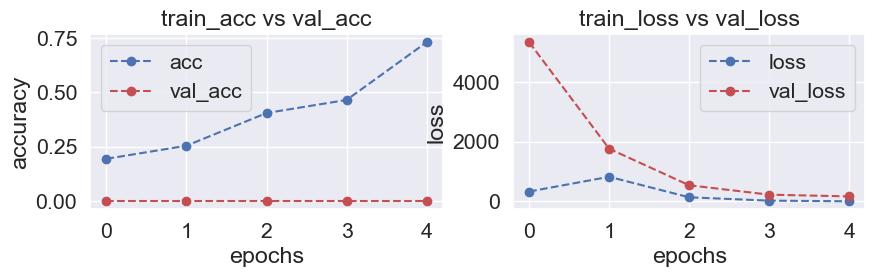

In [84]:
plot_accuracy_loss(history)

In [85]:
#using vgg16
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

model=VGG16(weights='imagenet',include_top=False)
model=Model(inputs=model.inputs,outputs=model.layers[-5].output)

In [86]:
train_features=model.predict(train_images)
test_features=model.predict(test_images)

4/4 [==============================] - 20s 4s/step


In [87]:
from keras.layers import Input,Dense,Conv2D,Activation,MaxPooling2D,Flatten

model2=VGG16(weights='imagenet',include_top=False)

input_shape=model2.layers[-4].get_input_shape_at(0)
layer_input=Input(shape=(14,14,512))

x=layer_input
for layer in model2.layers[-4::1]:
    x=layer(x)

x=Conv2D(64,(3,3),activation='relu')(x)
x=MaxPooling2D(pool_size=(2,2))(x)
x=Flatten()(x)
x=Dense(100,activation='relu')(x)
x=Dense(5,activation='softmax')(x)

new_model=Model(layer_input,x)

In [88]:
new_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [89]:
history=new_model.fit(train_features,train_labels,batch_size=128,epochs=4,validation_split=0.2)

Epoch 1/4
2/2 [==============================] - 14s 5s/step - loss: 23.4395 - accuracy: 0.2800 - val_loss: 4.9622 - val_accuracy: 0.0000e+00
Epoch 2/4
2/2 [==============================] - 12s 5s/step - loss: 2.6760 - accuracy: 0.2250 - val_loss: 1.7873 - val_accuracy: 0.0000e+00
Epoch 3/4
2/2 [==============================] - 12s 5s/step - loss: 1.6348 - accuracy: 0.2700 - val_loss: 2.4972 - val_accuracy: 0.0000e+00
Epoch 4/4
2/2 [==============================] - 12s 5s/step - loss: 2.5466 - accuracy: 0.2400 - val_loss: 1.8488 - val_accuracy: 0.0000e+00


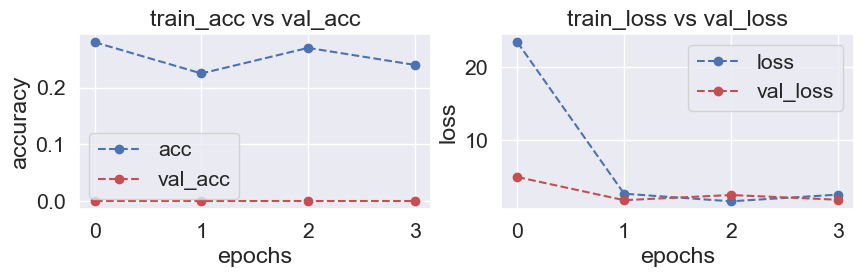

In [90]:
plot_accuracy_loss(history)

In [91]:
predictions=new_model.predict(test_features)
pred_labels=np.argmax(predictions,axis=1)
print("accuracy: {}".format(accuracy_score(test_labels,pred_labels)))

4/4 [==============================] - 2s 385ms/step


NameError: name 'accuracy_score' is not defined